In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('email.csv')

In [3]:
df.sample(5)

,Category,Message
5571,ham,Rofl. Its true to its name
4757,ham,Don't make life too stressfull.. Always find t...
135,spam,Want 2 get laid tonight? Want real Dogging loc...
4128,ham,"Sorry, I'll call later"
85,ham,"I call you later, don't have network. If urgnt..."


In [4]:
df.shape

(5573, 2)

## 1.Data Cleaning

In [5]:
#marking ham and spam as 0 or 1 using label encoder
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [6]:
df['Category']=encoder.fit_transform(df['Category'])

In [7]:
df.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
#Checking missing values
df.isnull().sum()

Category    0
Message     0
dtype: int64

In [9]:
#check for duplicate values
df.duplicated().sum()

np.int64(415)

In [10]:
#remove duplicate values
df=df.drop_duplicates(keep='first')

In [11]:
df.duplicated().sum()

np.int64(0)

In [12]:
df.shape

(5158, 2)

### 2.EDA

In [13]:
df.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
df['Category'].value_counts()

Category
0    4516
1     641
2       1
Name: count, dtype: int64

In [15]:
df = df[df['Category'] != 2]  # Exclude rows where Category is 2

In [16]:
df['Category'].value_counts()

Category
0    4516
1     641
Name: count, dtype: int64

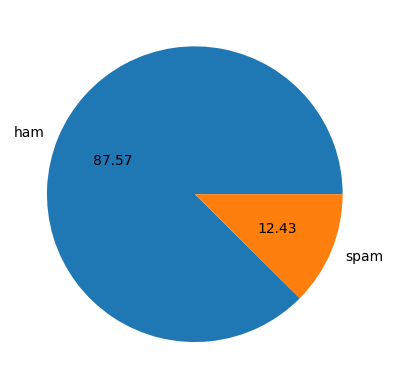

In [17]:
import matplotlib.pyplot as plt
plt.pie(df['Category'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [18]:
#Data is imbalanced as conclusion drawn from the above piechart

In [19]:
#Natural Language Toll Kit library
import nltk

In [20]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [21]:
df['num_characters']=df['Message'].apply(len)

In [22]:
df.head()

,Category,Message,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [23]:
# fetch the number of words
# every word is tokenize on the basis of word
df['num_words']=df['Message'].apply(lambda x: len(nltk.word_tokenize(x)))

In [24]:
df.head()

,Category,Message,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [25]:
#breaking on the basis of sentence
df['num_sentences']=df['Message'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [26]:
df.head()

,Category,Message,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [27]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5157.000000,5157.000000,5157.000000
mean,79.103936,18.560403,1.969750
std,58.382922,13.405970,1.455526
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.000000
75%,118.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [28]:
#describe for ham messages
df[df['Category']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.869353,17.267715,1.827724
std,56.708301,13.588065,1.394338
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,91.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [29]:
#describe for spam messages
df[df['Category']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,641.000000,641.000000,641.000000
mean,137.118565,27.667707,2.970359
std,30.399707,7.103501,1.485575
min,7.000000,2.000000,1.000000
25%,130.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


In [30]:
#ploting histogram
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

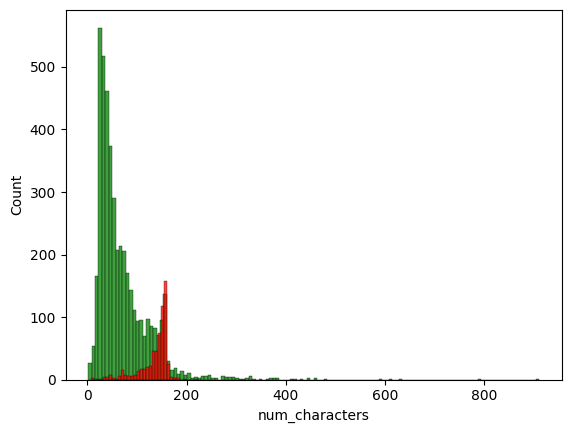

In [31]:
sns.histplot(df[df['Category']==0]['num_characters'],color='green')
sns.histplot(df[df['Category']==1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

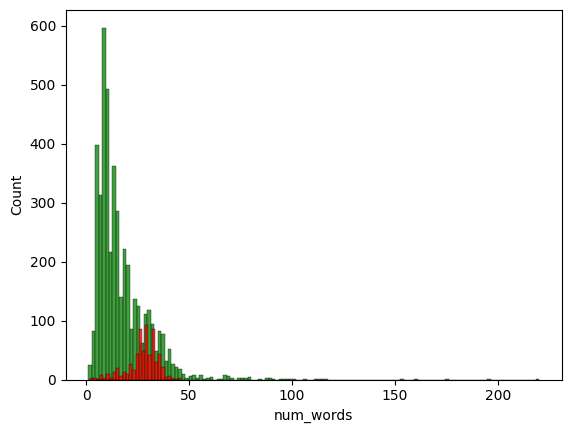

In [32]:
sns.histplot(df[df['Category']==0]['num_words'],color='green')
sns.histplot(df[df['Category']==1]['num_words'],color='red')

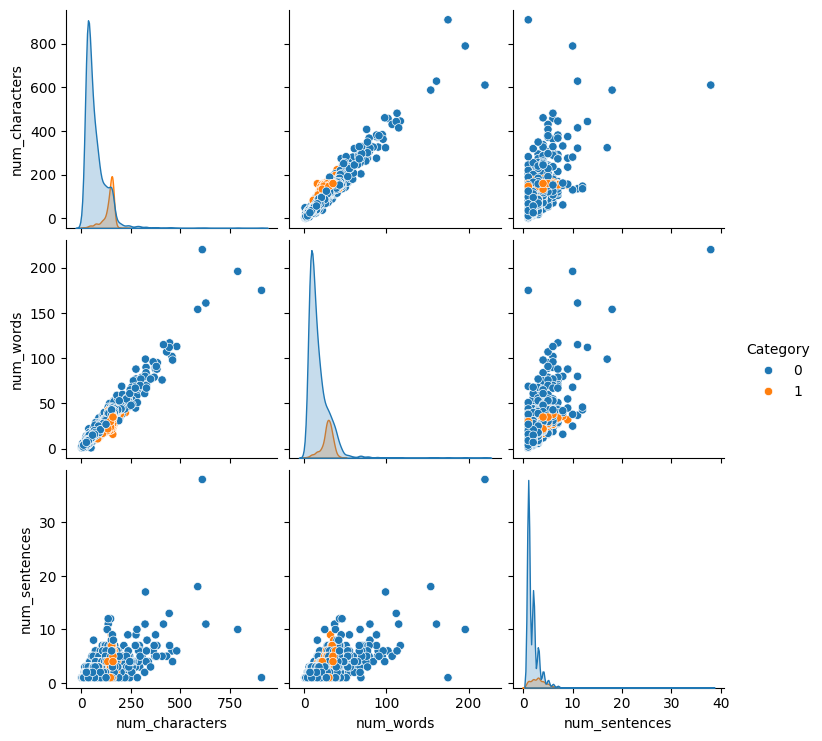

In [33]:
#relation between columns
sns.pairplot(df,hue='Category')

In [34]:
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()


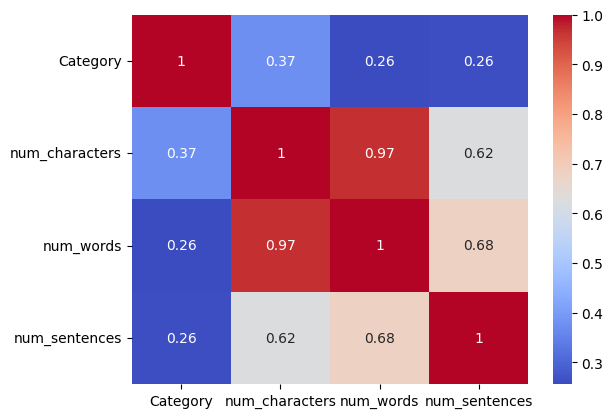

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


### 3.Data Preprocessing

In [36]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [37]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [38]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem('dancing')

'danc'

In [39]:
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)

    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)

    text=y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text=y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)
    

In [40]:
df['transformed_text']=df['Message'].apply(transform_text)

In [41]:
df.head()

,Category,Message,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [42]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [43]:
spam_wc=wc.generate(df[df['Category']==1]['transformed_text'].str.cat(sep=" "))

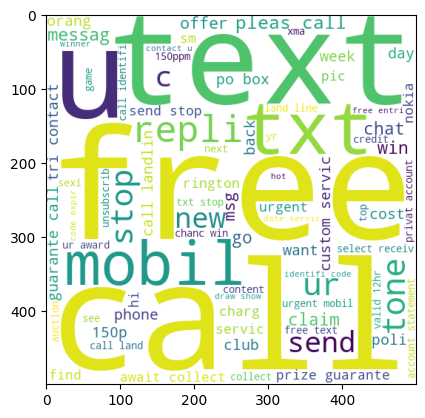

In [44]:
plt.imshow(spam_wc)

In [45]:
ham_wc=wc.generate(df[df['Category']==0]['transformed_text'].str.cat(sep=" "))

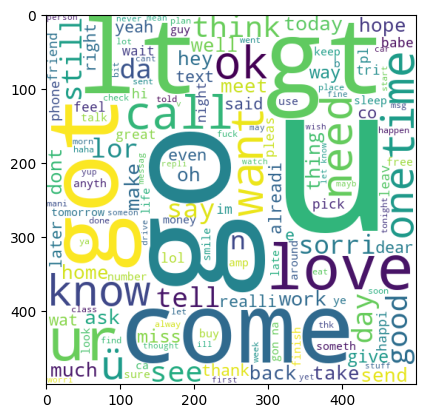

In [46]:
plt.imshow(ham_wc)

In [47]:
df.head()

,Category,Message,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [48]:
spam_corpus=[]
for msg in df[df['Category']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [49]:
len(spam_corpus)

9781

C:\Users\HP\AppData\Local\Temp\ipykernel_10712\3333536303.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1],palette="viridis")


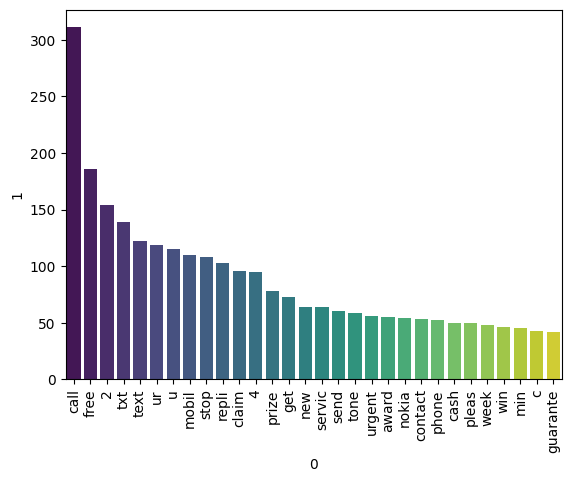

In [50]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1],palette="viridis")
plt.xticks(rotation='vertical')
plt.show()

In [51]:
ham_corpus=[]
for msg in df[df['Category']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [52]:
len(ham_corpus)

35940

C:\Users\HP\AppData\Local\Temp\ipykernel_10712\2427257418.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1],palette="viridis")


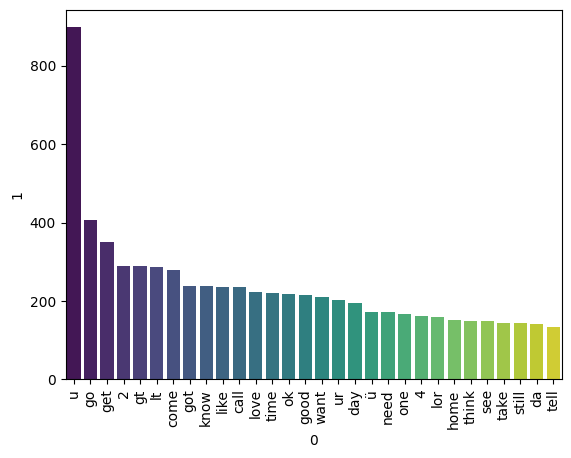

In [53]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1],palette="viridis")
plt.xticks(rotation='vertical')
plt.show()

### 4.Model Building

In [116]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer(max_features=3000)

In [117]:
X=tfidf.fit_transform(df['transformed_text']).toarray()

In [118]:
#from sklearn.preprocessing import MinMaxScaler
#scaler=MinMaxScaler()
#X=scaler.fit_transform(X)

In [119]:
#appending the num character col to X
#X=np.hstack((X,df['num_characters'].values.reshape(-1,1)))

In [120]:
X.shape

(5157, 3000)

In [121]:
y=df['Category'].values

In [122]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [123]:
from sklearn.model_selection import train_test_split

In [124]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [125]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [126]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [65]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8827519379844961
[[800 105]
 [ 16 111]]
0.5138888888888888


In [127]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9718992248062015
[[905   0]
 [ 29  98]]
1.0


In [67]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9825581395348837
[[903   2]
 [ 16 111]]
0.9823008849557522


In [68]:
#tfidf-->MNB

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [70]:
svc=SVC(kernel='sigmoid',gamma=0.1)
knc=KNeighborsClassifier()
mnb=MultinomialNB()
dtc=DecisionTreeClassifier(max_depth=5)
lrc=LogisticRegression(solver='liblinear',penalty='l1')
rfc=RandomForestClassifier(n_estimators=50,random_state=2)
abc=AdaBoostClassifier(n_estimators=50,random_state=2)
bc=BaggingClassifier(n_estimators=50,random_state=2)
etc=ExtraTreesClassifier(n_estimators=50,random_state=2)
gbdt=GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb=XGBClassifier(n_estimators=50,random_state=2)

In [71]:
clfs={
    'SVC': svc,
    'KN':knc,
    'NB':mnb,
    'DT':dtc,
    'LR':lrc,
    'RF':rfc,
    'AdaBoost':abc,
    'BgC':bc,
    'ETC':etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [72]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    precision=precision_score(y_test,y_pred)
    return accuracy,precision

In [73]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.875968992248062, np.float64(0.0))

In [74]:
accuracy_scores=[]
precision_scores=[]
for name,clf in clfs.items():
    current_accuracy,current_precision=train_classifier(clf,X_train,y_train,X_test,y_test)
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.875968992248062
Precision -  0.0
For  KN
Accuracy -  0.9282945736434108
Precision -  0.7054263565891473
For  NB
Accuracy -  0.939922480620155
Precision -  1.0
For  DT
Accuracy -  0.9573643410852714
Precision -  0.9278350515463918
For  LR
Accuracy -  0.9641472868217055
Precision -  0.9591836734693877
For  RF
Accuracy -  0.9757751937984496
Precision -  1.0


C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For  AdaBoost
Accuracy -  0.9670542635658915
Precision -  0.926605504587156
For  BgC
Accuracy -  0.9728682170542635
Precision -  0.9541284403669725
For  ETC
Accuracy -  0.9806201550387597
Precision -  1.0
For  GBDT
Accuracy -  0.9554263565891473
Precision -  0.9354838709677419
For  xgb
Accuracy -  0.9738372093023255
Precision -  0.9716981132075472


In [75]:
performance_df=pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [76]:
performance_df

,Algorithm,Accuracy,Precision
2,NB,0.939922,1.000000
8,ETC,0.980620,1.000000
5,RF,0.975775,1.000000
10,xgb,0.973837,0.971698
4,LR,0.964147,0.959184
7,BgC,0.972868,0.954128
9,GBDT,0.955426,0.935484
3,DT,0.957364,0.927835
6,AdaBoost,0.967054,0.926606
1,KN,0.928295,0.705426


In [77]:
performance_df1=pd.melt(performance_df,id_vars="Algorithm")

In [78]:
performance_df1

,Algorithm,variable,value
0,NB,Accuracy,0.939922
1,ETC,Accuracy,0.980620
2,RF,Accuracy,0.975775
3,xgb,Accuracy,0.973837
4,LR,Accuracy,0.964147
5,BgC,Accuracy,0.972868
6,GBDT,Accuracy,0.955426
7,DT,Accuracy,0.957364
8,AdaBoost,Accuracy,0.967054
9,KN,Accuracy,0.928295


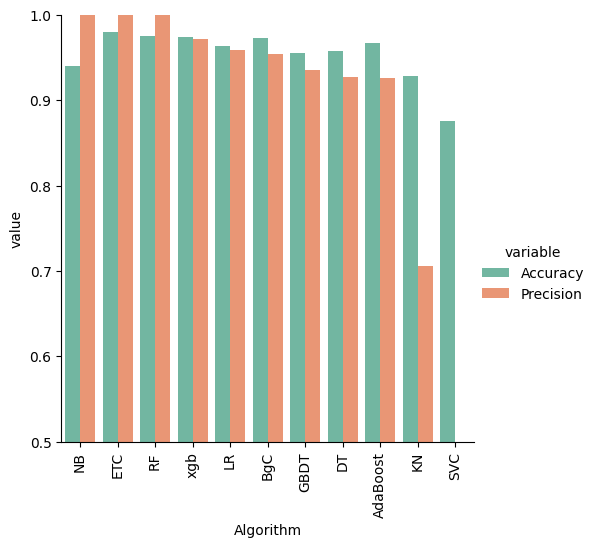

In [79]:
sns.catplot(x='Algorithm',y='value',
            hue='variable',data=performance_df1,kind='bar',height=5,palette='Set2')
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [80]:
#model improve
# 1.change the max_features parameter of tfidf

In [81]:
temp_df=pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [82]:
performance_df.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000
0,NB,0.939922,1.000000,0.939922,1.000000
1,ETC,0.980620,1.000000,0.980620,1.000000
2,RF,0.975775,1.000000,0.975775,1.000000
3,xgb,0.973837,0.971698,0.973837,0.971698
4,LR,0.964147,0.959184,0.964147,0.959184
5,BgC,0.972868,0.954128,0.972868,0.954128
6,GBDT,0.955426,0.935484,0.955426,0.935484
7,DT,0.957364,0.927835,0.957364,0.927835
8,AdaBoost,0.967054,0.926606,0.967054,0.926606
9,KN,0.928295,0.705426,0.928295,0.705426


In [83]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [84]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [85]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)


In [86]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000_x,Precision_max_ft_3000_x,Accuracy_max_ft_3000_y,Precision_max_ft_3000_y,Accuracy_num_chars,Precision_num_chars
0,NB,0.939922,1.000000,0.939922,1.000000,0.939922,1.000000,0.939922,1.000000
1,ETC,0.980620,1.000000,0.980620,1.000000,0.980620,1.000000,0.980620,1.000000
2,RF,0.975775,1.000000,0.975775,1.000000,0.975775,1.000000,0.975775,1.000000
3,xgb,0.973837,0.971698,0.973837,0.971698,0.973837,0.971698,0.973837,0.971698
4,LR,0.964147,0.959184,0.964147,0.959184,0.964147,0.959184,0.964147,0.959184
5,BgC,0.972868,0.954128,0.972868,0.954128,0.972868,0.954128,0.972868,0.954128
6,GBDT,0.955426,0.935484,0.955426,0.935484,0.955426,0.935484,0.955426,0.935484
7,DT,0.957364,0.927835,0.957364,0.927835,0.957364,0.927835,0.957364,0.927835
8,AdaBoost,0.967054,0.926606,0.967054,0.926606,0.967054,0.926606,0.967054,0.926606
9,KN,0.928295,0.705426,0.928295,0.705426,0.928295,0.705426,0.928295,0.705426


In [87]:
#vooting classifier
svc=SVC(kernel='sigmoid',gamma=1.0,probability=True)
mnb=MultinomialNB()
etc=ExtraTreesClassifier(n_estimators=50,random_state=2)

from sklearn.ensemble import VotingClassifier

In [88]:
voting=VotingClassifier(estimators=[('svm',svc),('nb',mnb),('et',etc)],voting='soft')

In [89]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [90]:
y_pred=voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.937984496124031
Precision 1.0


In [91]:
#Applying stacking
estimators=[('svm',svc),('nb',mnb),('et',etc)]
final_estimator=RandomForestClassifier()

In [92]:
from sklearn.ensemble import StackingClassifier

In [93]:
clf=StackingClassifier(estimators=estimators,final_estimator=final_estimator)

In [94]:
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9854651162790697
Precision 1.0


In [128]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))
